Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

Mounting to Google Drive

In [ ]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Load the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User_Data.csv')

Extracting Independent and dependent Variable


In [ ]:
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

Split the data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

Feature Scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fitting Naive Bayes to the Training set

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Predicting the Test set results

In [ ]:
y_pred = classifier.predict(x_test)

Making the Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 7, 25]])

Calculate accuracy

In [ ]:
accuracy_score(y_test, y_pred)

0.9

Plotting the decision boundary

<ipython-input-19-8a80b0551b7a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


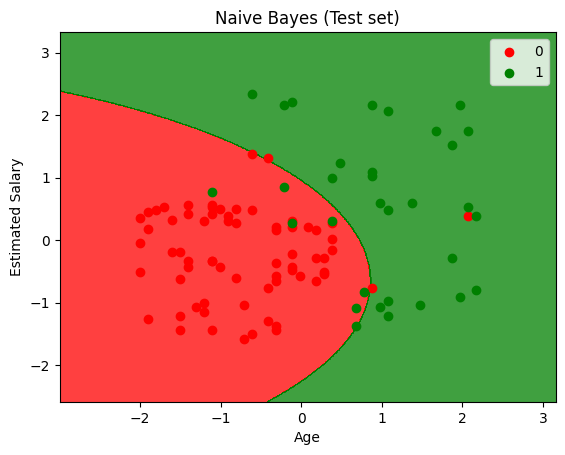

In [ ]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()